*******TO DO************
1. Enable segmentation by clicking a single point and extrapolation to an ROI

Purpose of this notebook:

1. Enable quick manual segmentation of large TIF images containing multiple tiles in x-y and multiple z-planes, in a single channel
2. Create a table of cells X ROIs also containing information about the location of the cell in vivo (within a particular FOV)
3. Allow each cell to have ROIs in multiple z planes
4. Work with single image stitched in x-y if possible
5. Use ROIs from one channel to calculate intensity in other channels and produce histogram

Make sure notebook is opened in py365 environment

# Setup

In [1]:
%gui qt5 

In [84]:
# Imports in alphabetical order of module name

from IPython.display import display
from PIL import Image, ImageDraw
import napari
import numpy as np
import pickle as pkl
import matplotlib.path as mpltpath
import matplotlib.pyplot as plt
from skimage.measure import profile_line
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
import matplotlib.colors as colors

# Load images

## Segmentation channel

In [3]:
## Specify images to load

# folder2 = 'Z:\HCR\9.2_FISH\S1_dapi_546_488_647'
#folder = 'Z:\HCR\HCR_10.17\S2_DAPI_546_647_514_594_2019_10_19__16_28_49'
folder = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17\\S2_DAPI_546_647_514_594_2019_10_19__16_28_49'

# base_filename2 = 'S1_dapi_546_488_647_s2z'
base_filename = 'S2_DAPI_546_647_514_594_2019_10_19__16_28_49_z'

plane_nos = range(1, 5)
n = len(plane_nos)
print('Number of planes: {0}'.format(n))

Number of planes: 4


In [7]:
'{0}\{1}{2}c4_ORG.tif'.format(folder, base_filename, str(plane_nos[0]).zfill(2))

'G:\\Shared drives\x07s_share\\HCR\\HCR_10.17\\S2_DAPI_546_647_514_594_2019_10_19__16_28_49\\S2_DAPI_546_647_514_594_2019_10_19__16_28_49_z01c4_ORG.tif'

In [4]:
# Create 4D array to store images
img = Image.open('{0}\\{1}{2}c4_ORG.tif'.format(folder, base_filename, str(plane_nos[0]).zfill(2)))
# img2 = Image.open('{0}\{1}{2}c1+2+3+4.tif'.format(folder2, base_filename2, str(plane_nos[0]).zfill(2)))

h = img.height
# h2 = img2.height                  
                  
w = img.width
# w2 = img2.width
                  
# c = np.array(img).shape[2]
im_array = np.zeros([n, h, w])
# im_array2 = np.zeros([n, h2, w2])
print('Size of image in pixels: {0} X {1} X {2}'.format(n, h, w))

for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    img = Image.open('{0}\{1}{2}c4_ORG.tif'.format(folder, base_filename, str(p).zfill(2)))
#     img2 = Image.open('{0}\{1}{2}c1+2+3+4.tif'.format(folder2, base_filename2, str(p).zfill(2)))
    try:
        im_array[i, :, :] = np.array(img)
#         im_array2[i, :, :] = np.array(img2)[:, :, 0]
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue


Size of image in pixels: 4 X 2867 X 11161
Loading image 1
Loading image 2
Loading image 3
Loading image 4


## Load other channels

In [10]:
# Background subtracted
print('Ndnf')
im_array_ndnf = np.zeros([n, h, w])
img_file = 'S2_Ndnf_bg_sub2'
img = Image.open('{0}\{1}.tif'.format(folder, img_file))
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    try:
        img.seek(p - 1)
        im_array_ndnf[i, :, :] = np.array(img)
        
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_ndnf = np.delete(im_array_ndnf, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

print('Vip')
im_array_vip = np.zeros([n, h, w])
img_file = 'S2_Vip_bg_sub2'
img = Image.open('{0}\{1}.tif'.format(folder, img_file))
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    try:
        img.seek(p - 1)
        im_array_vip[i, :, :] = np.array(img)
        
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_vip = np.delete(im_array_vip, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue
        
        
print('Sst')
im_array_sst = np.zeros([n, h, w])
img_file = 'S2_Sst_bg_sub2'
img = Image.open('{0}\{1}.tif'.format(folder, img_file))
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    try:
        img.seek(p - 1)
        im_array_sst[i, :, :] = np.array(img)
        
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_sst = np.delete(im_array_sst, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue    

Ndnf


FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17\\S2_DAPI_546_647_514_594_2019_10_19__16_28_49\\S2_Ndnf_bg_sub2.tif'

In [5]:
im_array_ndnf = np.zeros([n, h, w])
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    img = Image.open('{0}\{1}{2}c3_ORG.tif'.format(folder, base_filename,str(p).zfill(2)))
    try:
        im_array_ndnf[i, :, :] = np.array(img)
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_ndnf = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

Loading image 1
Loading image 2
Loading image 3
Loading image 4


In [6]:
im_array_vip = np.zeros([n, h, w])
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    img = Image.open('{0}\{1}{2}c2_ORG.tif'.format(folder, base_filename,str(p).zfill(2)))
    try:
        im_array_vip[i, :, :] = np.array(img)
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_vip = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

Loading image 1
Loading image 2
Loading image 3
Loading image 4


In [7]:
im_array_sst = np.zeros([n, h, w])
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    img = Image.open('{0}\{1}{2}c5_ORG.tif'.format(folder, base_filename,str(p).zfill(2)))
    try:
        im_array_sst[i, :, :] = np.array(img)
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_sst = np.delete(im_array, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

Loading image 1
Loading image 2
Loading image 3
Loading image 4


# Segmentation

## Data structure to store information about cells

In [14]:
class Cell:
    n_cells = 1
    cell_data = {}
    
    def __init__(self, cell_no):
        
        self.cell_no = cell_no
        self.z_planes = []
        self.no_planes = 0
        self.masks = {}
        self.c_vals = np.zeros(1)
        print('Cell #{0} created'.format(Cell.n_cells))
        
    def add_mask(self, z_plane, mask):
        self.z_planes.append(z_plane)
        self.no_planes += 1
        self.masks[z_plane] = mask
            
    def save_cell(self):
        Cell.cell_data[self.cell_no] = {'cell_id': self.cell_no,
                                 'z_planes': self.z_planes,
                                 'masks': self.masks,
                                 'no_planes': self.no_planes,
                                 'c_vals':self.c_vals}

In [15]:
# Load masks if they already exist
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17'
save_file= 'S2_data.pkl'
try:
    with open('{0}\{1}'.format(save_loc, save_file), 'rb') as f:
        Cell.cell_data = pkl.load(f)
        indices = list(Cell.cell_data.keys())
        if not np.max(indices) == len(indices):
            print('Re-numbering cells to be consecutive')
            Cell.cell_data_temp = {}
            for i in range(len(indices)):
                Cell.cell_data_temp[i + 1] = Cell.cell_data[indices[i]]
                Cell.cell_data_temp[i + 1]['cell_id'] = i + 1
            Cell.cell_data = Cell.cell_data_temp 
            with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
                pkl.dump(Cell.cell_data, f)
            Cell.n_cells = i + 1
        else:
            Cell.n_cells = len(indices)
    print('{0} cells found'.format(Cell.n_cells))
except:
    print('No data found')

240 cells found


## Render image in napari GUI

In [127]:
# Open image in napari viewer - each channel as a separate layer 
viewer = napari.Viewer()

viewer.add_image(im_array[:, :, :], name = 'Channel {0}'.format(i + 1), colormap = 'viridis', 
                     interpolation = 'nearest')
    
seg_channel = 0

viewer.add_shapes(name = 'masks', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)
mask_layer = viewer.layers['masks']

viewer.add_points(name = 'points', opacity = 0.5, face_color = 'white', edge_color = 'black')
point_layer = viewer.layers['points']

# Add existing masks
# indices = list(Cell.cell_data.keys())
# for cell in indices:
#     plane = Cell.cell_data[cell]['z_planes'][0]
#     mask = Cell.cell_data[cell]['masks'][plane]
#     mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)

# Keybinding functions

@viewer.bind_key('n')
def new_cell(viewer):
    global cell1 
    Cell.n_cells += 1
    cell1 = Cell(Cell.n_cells)
    print(Cell.n_cells)

@viewer.bind_key('d')
def get_disc_roi(viewer):
    center = point_layer.data[-1, 1:] # Last drawn point
    seg_layer = viewer.layers[seg_channel]
    z_plane = seg_layer.coordinates[0]
    image = im_array[z_plane, :, :]
    cell_radius_px = 40

    boundary = disc_roi(image, center, cell_radius_px)

    n_theta = boundary.shape[1]
    mask = np.zeros([n_theta, 3])
    mask[:, 0] = np.ones(n_theta)*z_plane
    mask[:, 1:] = np.transpose(boundary)
    mask_layer.add(mask, shape_type= 'polygon')
    
@viewer.bind_key('m')
def add_mask(viewer):
    seg_layer = viewer.layers[seg_channel]
    z_plane = seg_layer.coordinates[0]
    mask = viewer.layers['masks'].data[-1]
    cell1.add_mask(z_plane, mask)
    
@viewer.bind_key('k')
def save_cell(viewer):
    cell1.save_cell()
    
@viewer.bind_key('Control-s')
def save_all(viewer):
    with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
                pkl.dump(Cell.cell_data, f)

## Get disc ROI from center point

Code translated to python from Tsai-Wen's Matlab version. 

Input arguments:
1. 'image': nXm reference image (numpy array)
2. 'center': 1X2 vector (row, col) containing the coordinates of the ROI center
3. 'cell_radius_px': rough estimate of the expected radius of a cell, in pixels
4. 'plot_flag': set plot_flag = 1 to generate a panel of detailed figures
5. 'n_theta': number of 'corners' of ROI polygon, default 90
6. 'thresh': 

Returns:
1. 'boundary_list': n_thetaX2 vector containing coordinates of ROI polygon corners

In [294]:
def disc_roi(image, center, cell_radius_px, n_theta = 90, thresh = 0.2):
    
    full_radius = round(1.3*cell_radius_px)
    thetas = np.linspace(0, 2*np.pi, n_theta)
    [x, y] = center
    
    
    line_profiles = np.zeros([full_radius, n_theta])
    
    r_threshold_cross = np.zeros(n_theta)
    
    for t in range(n_theta):
        theta = thetas[t]
        f = profile_line(image, (x, y), (x + full_radius*np.cos(theta), y + full_radius*np.sin(theta)))
        r_threshold_cross[t] = find_first_cross(f, thresh)
        line_profiles[:, t] = -1*np.abs(np.array(range(full_radius)) - r_threshold_cross[t]) + full_radius;
        
    path = find_path(line_profiles)
    
    boundary = np.zeros([2, n_theta])
    boundary[0, :] = x + np.multiply(path, np.cos(thetas))
    boundary[1, :] = y + np.multiply(path, np.sin(thetas))
    boundary = boundary.astype(int)
    
    return boundary

def find_first_cross(line_profile, thresh):
    
    # Assumes line profile goes from inside cell to outside
    max_val = np.max(line_profile)
    max_idx = np.argmax(line_profile)
    min_val_out = np.min(line_profile[max_idx:]) # Minimum intensity outside cell
    
    thresh_val = min_val_out + thresh*(max_val - min_val_out)
    r_cross = max_idx + np.where(line_profile[max_idx:] < thresh_val)[0][0]
    
    return r_cross

def find_path(line_profiles):
    
    # line_profiles should be of shape radius X n_theta
    radius = line_profiles.shape[0]
    n_theta = line_profiles.shape[1]
    
    pointer = np.zeros([radius, n_theta])
    value = np.zeros([radius, n_theta])
    value[:, 0] = line_profiles[:, 0]
    
    for i in range(1, n_theta):
        for j in range(1, radius - 1):
            
            M = np.max(value[j-1:j+1, i-1])
            ind = np.argmax(value[j-1:j+1, i-1])
            
            value[j, i] = M + line_profiles[j, i]
            pointer[j,i] = j + ind - 1
            
    # Second traverse to minimize boundary effect
    pointer = np.zeros([radius, n_theta])
    value[:, 1] = value[:, -1]
    
    for i in range(1, n_theta):
        for j in range(1, radius - 1):
            
            M = np.max(value[j-1:j+1, i-1])
            ind = np.argmax(value[j-1:j+1, i-1])
            
            value[j, i] = M + line_profiles[j, i]
            pointer[j,i] = j + ind - 1
    
    path = np.zeros(n_theta).astype(int)
    
    M = np.max(value[:, -1])
    ind = np.argmax(value[:, -1])
    path[-1] = ind
    
    for j in np.flip(range(1, n_theta)):
        path[j-1] = pointer[path[j], j]
        
    return path

### Find intensity profile of a line joining two points

In [250]:
image = im_array[0, :, :]

[x1, y1] = point_layer.data[0, 1:]
[x2, y2] = point_layer.data[1, 1:]

profile = profile_line(image, (x1, y1), (x2, y2))
n_points = profile.shape
px_dist = np.floor(np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2])))
print('Pixel distance = {0}, number of points in profile = {1}'.format(px_dist, n_points))

print('x1 = {0}, y1 = {1}, x2 = {2}, y2 = {3}'.format(x1, y1, x2, y2))

Pixel distance = 43.0, number of points in profile = (45,)
x1 = 1489.118335486715, y1 = 4326.501347105877, x2 = 1476.3124182304575, y2 = 4368.434448709701


### Find point where intensity falls below threshold

In [251]:
thresh = 0.2
line_profile = profile
max_val = np.max(line_profile)
max_idx = np.argmax(line_profile)
min_val_out = np.min(line_profile[max_idx:]) # Minimum intensity outside cell
thresh_val = min_val_out + thresh*(max_val - min_val_out)
r_cross = max_idx + np.where(line_profile[max_idx:] < thresh_val)[0][0]

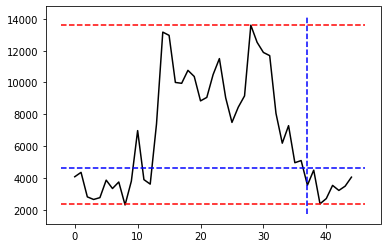

In [252]:
plt.figure()
plt.plot(line_profile, color = 'k')

xl = np.array(plt.gca().get_xlim())
yl = np.array(plt.gca().get_ylim())
xi = np.linspace(xl[0], xl[1], 10)
yi = np.linspace(yl[0], yl[1], 10)

plt.plot(xi, np.ones(10)*max_val, color = 'r', linestyle = '--')
plt.plot(xi, np.ones(10)*min_val_out, color = 'r', linestyle = '--')
plt.plot(xi, np.ones(10)*thresh_val, color = 'b', linestyle = '--')
plt.plot(np.ones(10)*r_cross, yi, color = 'b', linestyle = '--')

### Find intensity profile at several angles around a center

Text(0.5, 1.0, 'Pixel intensity')

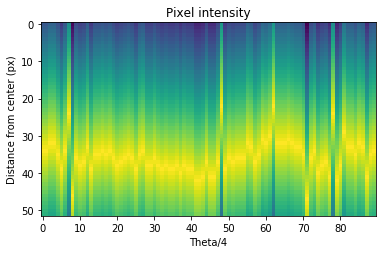

In [275]:
center = [x1, y1]
cell_radius_px = 40
n_theta = 90
thresh = 0.2

full_radius = round(1.3*cell_radius_px)
thetas = np.linspace(0, 2*np.pi, n_theta)
[h, w] = image.shape
[x, y] = center


line_profiles = np.zeros([full_radius, n_theta])
line_profiles_mod = np.zeros([full_radius, n_theta])

r_threshold_cross = np.zeros(n_theta)

for t in range(n_theta):
    theta = thetas[t]
    f = profile_line(image, (x, y), (x + full_radius*np.cos(theta), y + full_radius*np.sin(theta)))
    line_profiles[:, t] = f[:full_radius]
    r_threshold_cross[t] = find_first_cross(f, thresh)
    line_profiles_mod[:, t] = -1*np.abs(np.array(range(full_radius)) - r_threshold_cross[t]) + full_radius;
    
plt.figure()
plt.imshow(line_profiles_mod)
plt.xlabel('Theta/4')
plt.ylabel('Distance from center (px)')
plt.title('Pixel intensity')

### Find boundary of cell from intensity profiles

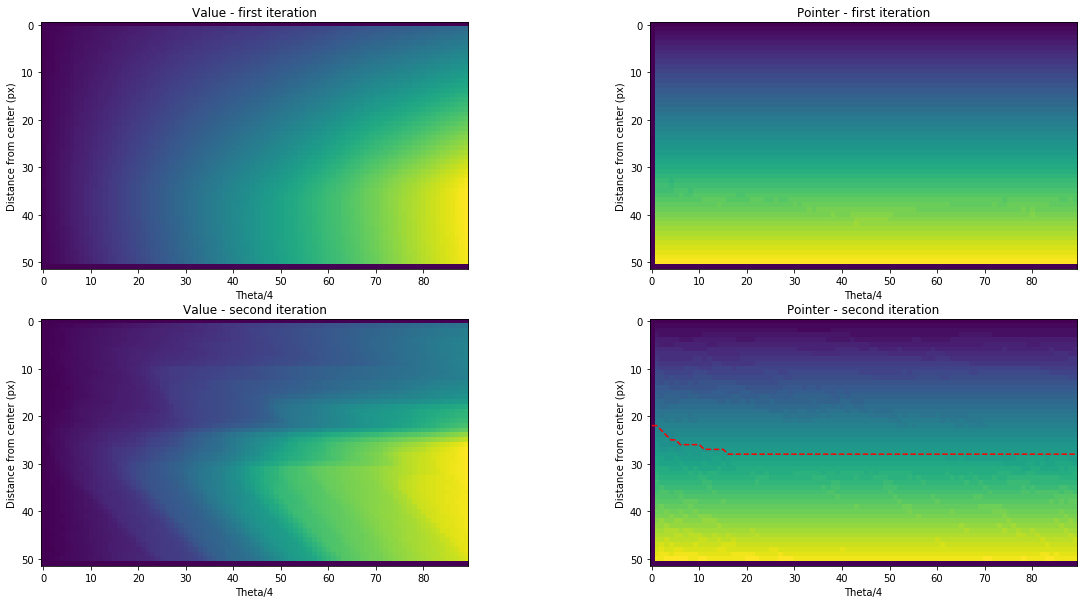

In [281]:
radius = line_profiles.shape[0]
n_theta = line_profiles.shape[1]

pointer = np.zeros([radius, n_theta])
value = np.zeros([radius, n_theta])
value[:, 0] = line_profiles_mod[:, 0]

for i in range(1, n_theta):
    for j in range(1, radius - 1):

        M = np.max(value[j-1:j+1, i-1])
        ind = np.argmax(value[j-1:j+1, i-1])

        value[j, i] = M + line_profiles_mod[j, i]
        pointer[j,i] = j + ind - 1
        
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
ax[0, 0].imshow(value)
ax[0, 0].set_xlabel('Theta/4')
ax[0, 0].set_ylabel('Distance from center (px)')
ax[0, 0].set_title('Value - first iteration')

ax[0, 1].imshow(pointer)
ax[0, 1].set_xlabel('Theta/4')
ax[0, 1].set_ylabel('Distance from center (px)')
ax[0, 1].set_title('Pointer - first iteration')

# Second traverse to minimize boundary effect
pointer = np.zeros([radius, n_theta])
value[:, 1] = value[:, -1]

for i in range(1, n_theta):
    for j in range(1, radius - 1):

        M = np.max(value[j-1:j+1, i-1])
        ind = np.argmax(value[j-1:j+1, i-1])

        value[j, i] = M + line_profiles[j, i]
        pointer[j,i] = j + ind - 1

ax[1, 0].imshow(value)
ax[1, 0].set_xlabel('Theta/4')
ax[1, 0].set_ylabel('Distance from center (px)')
ax[1, 0].set_title('Value - second iteration')

ax[1, 1].imshow(pointer)
ax[1, 1].set_xlabel('Theta/4')
ax[1, 1].set_ylabel('Distance from center (px)')
ax[1, 1].set_title('Pointer - second iteration')

path = np.zeros(n_theta).astype(int)
    
M = np.max(value[:, -1])
ind = np.argmax(value[:, -1])
path[-1] = ind

for j in np.flip(range(1, n_theta)):
    path[j-1] = pointer[path[j], j]
    
boundary = np.zeros([2, n_theta])
boundary[0, :] = x + np.multiply(path, np.cos(thetas))
boundary[1, :] = y + np.multiply(path, np.sin(thetas))
boundary = boundary.astype(int)
    
ax[1, 1].plot(path, color = 'r', linestyle = '--')

## Manual segmentation

In [21]:
Cell.n_cells

1

In [85]:
if Cell.n_cells > 1:
    cell1.save_cell()
    print('Cell {0} saved'.format(cell1.cell_no))
cell1 = Cell(Cell.n_cells)

Cell 21 saved
Cell #22 created


In [87]:
seg_layer = viewer.layers[seg_channel]
z_plane = seg_layer.coordinates[0]


mask = viewer.layers['masks'].data[-1]
cell1.add_mask(z_plane, mask)
print('mask {0} added in z-plane {1} for cell {2}'.format(cell1.no_planes, z_plane, cell1.cell_no))

mask 2 added in z-plane 11 for cell 22


In [88]:
with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
    pkl.dump(cell_data, f)

# Calculate intensity in masks for each channel

In [7]:
try:
    with open('F:/HCR/HCR_10.17/S2_mask_vertices.pkl'.format(folder), 'rb') as f:
        mask_vertices = pkl.load(f)
        print('Data loaded')
        
except IOError:
    print('No saved data found, calculating mask pixels')
    xv = range(w)
    yv = range(h)
    coord_array = np.array(np.meshgrid(xv, yv))

    points = np.zeros([h*w, 2])
    p = 0
    for i in range(h):
        for j in range(w):
            points[p, 1] = coord_array[0, i, j]
            points[p, 0] = coord_array[1, i, j]
            p += 1

    no_cells = len(Cell.cell_data.keys())
    mask_vertices = {}
    for cell in range(no_cells):
        if np.mod(cell, 10) == 0:
            print('Cell {0}'.format(cell))
        cell_no = cell + 1
        mask_vertices[cell_no] = {}
        cell_dict = Cell.cell_data[cell_no]
        masks = cell_dict['masks']
        z_planes = cell_dict['z_planes']
        for plane in z_planes:

            vertices = masks[plane]
            path = mpltpath.Path(vertices)
            mask = path.contains_points(points)
            mask = np.reshape(mask, [h, w])
            mask_vertices[cell_no][plane] = np.where(mask)

    with open('F:/HCR/HCR_10.17/S2_mask_vertices.pkl'.format(folder), 'wb') as f:
        pkl.dump(mask_vertices, f)

Data loaded


In [8]:
with open('F:/HCR/HCR_10.17/S2_data_ndnf_sst_vip.pkl', 'rb') as f:
        sig = pkl.load(f)
avg_intensity_ndnf = sig['Ndnf']
avg_intensity_sst = sig['Sst'] 
avg_intensity_vip = sig['Vip']

In [8]:
no_cells = len(Cell.cell_data.keys())
avg_intensity_ndnf = np.zeros(no_cells)
avg_intensity_vip = np.zeros(no_cells)
avg_intensity_sst = np.zeros(no_cells)

for cell in range(no_cells):
    
    if np.mod(cell, 10) == 0:
        print('Cell {0}'.format(cell))
    cell_no = cell + 1
    cell_dict = Cell.cell_data[cell_no]
    z_planes = cell_dict['z_planes']

    intensity_ndnf = np.zeros(cell_dict['no_planes'])
    intensity_vip = np.zeros(cell_dict['no_planes'])
    intensity_sst = np.zeros(cell_dict['no_planes'])
    
    i = 0
    for plane in z_planes:

        xy_coord = mask_vertices[cell_no][plane]
        x = xy_coord[0]
        y = xy_coord[1]
        intensity_ndnf[i] = np.mean(im_array_ndnf[plane, x, y])
        intensity_vip[i] = np.mean(im_array_vip[plane, x, y])
        intensity_sst[i] = np.mean(im_array_sst[plane, x, y])
        i += 1
    
    avg_intensity_ndnf[cell] = np.mean(intensity_ndnf)
    avg_intensity_vip[cell] = np.mean(intensity_vip)
    avg_intensity_sst[cell] = np.mean(intensity_sst)

    with open('F:/HCR/HCR_10.17/S2_data_ndnf_sst_vip.pkl', 'wb') as f:
        pkl.dump({'Ndnf': avg_intensity_ndnf, 'Sst': avg_intensity_sst, 'Vip':avg_intensity_vip}, f)

Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130
Cell 140
Cell 150
Cell 160
Cell 170
Cell 180
Cell 190
Cell 200
Cell 210
Cell 220
Cell 230


### Plotting

(array([ 7., 15., 26., 31., 22., 22., 16., 11., 10.,  5.,  4.,  7.,  4.,
         6.,  3.,  0.,  1.,  1.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0.01725823, 0.03691306, 0.0565679 , 0.07622273, 0.09587757,
        0.11553241, 0.13518724, 0.15484208, 0.17449691, 0.19415175,
        0.21380658, 0.23346142, 0.25311625, 0.27277109, 0.29242592,
        0.31208076, 0.3317356 , 0.35139043, 0.37104527, 0.3907001 ,
        0.41035494, 0.43000977, 0.44966461, 0.46931944, 0.48897428,
        0.50862911, 0.52828395, 0.54793879, 0.56759362, 0.58724846,
        0.60690329, 0.62655813, 0.64621296, 0.6658678 , 0.68552263,
        0.70517747, 0.7248323 , 0.74448714, 0.76414197, 0.78379681,
        0.80345165, 0.82310648, 0.84276132, 0.86241615, 0.88207099,
        0.90172582, 0.92138066, 0.94103549, 0.96069033, 0.98034516,
        1.        ]),
 <a list of 50

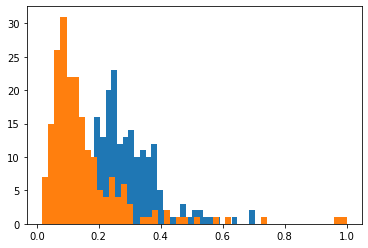

In [25]:
plt.hist(avg_intensity_egln3/np.nanmax(avg_intensity_egln3), 50)
plt.hist(avg_intensity_npy/np.nanmax(avg_intensity_npy), 50)

In [836]:
avg_intensity

array([24.95022124, 40.51698552, 29.09375251, 29.70655193, 34.28772759,
       26.79298246, 32.11151902, 36.66856214, 31.12916451, 30.94487015,
       31.73982033, 43.42839613, 32.75322324, 35.283061  , 51.98990961,
       31.53225302, 40.76069519, 41.11062645, 40.17823601, 37.93169793,
       53.76939491, 42.54205998, 38.89276079, 35.80030759, 29.70721714,
       31.29138233, 26.49753248, 33.4169647 , 48.89624381, 35.60775862,
       37.37936089, 40.91992248, 38.84522526, 39.96567944, 38.72161887,
       36.22450535, 31.1216872 , 32.1789749 , 37.56818182, 31.7029703 ,
       25.12078545, 31.4352518 , 32.83067422, 29.86585859, 28.95391335,
       25.38526056, 25.26495726, 17.05158859, 32.95391705, 29.29847772,
       27.65829146, 29.2310909 , 29.20095163, 26.92653061, 24.15262701,
       27.38459205, 23.84102183, 27.70256569, 28.7169158 , 27.32855492,
       24.42166442, 29.33239191, 37.91411043, 29.01273972, 22.71582282,
       29.10530973, 25.72648526, 31.79910714, 31.79378318, 36.26

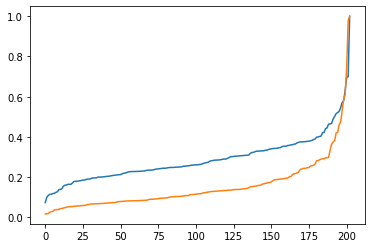

In [26]:
plt.plot(np.sort(avg_intensity_egln3)/np.nanmax(avg_intensity_egln3))
plt.plot(np.sort(avg_intensity_npy)/np.nanmax(avg_intensity_npy))

Text(0.8, 1, '0.0 %')

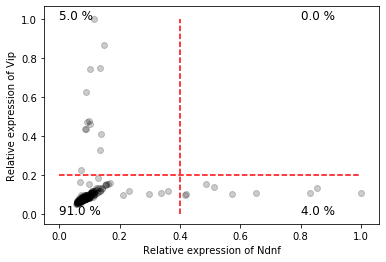

In [15]:
plt.figure()
gene1_level = avg_intensity_sst
gene2_level = avg_intensity_vip

plt.scatter(gene1_level/np.max(gene1_level), gene2_level/np.max(gene2_level), 
            color = 'k', marker = 'o',
           alpha = 0.2)


plt.xlabel('Relative expression of Ndnf')
plt.ylabel('Relative expression of Vip')

t1 = 0.4
t2 = 0.2

n_cells = Cell.n_cells
plt.plot(np.ones(2)*t1, np.array(range(0, 2)), '--', color = 'r')
plt.plot(np.array(range(0, 2)), np.ones(2)*t2, '--',  color = 'r')

q1 = np.sum(np.logical_and(gene1_level/np.max(gene1_level) < t1, 
                    gene2_level/np.max(gene2_level) < t2))
plt.text(0, 0, '{0} %'.format(np.round(q1/n_cells*100, decimals = 0)), fontsize = 12)

q2 = np.sum(np.logical_and(gene1_level/np.max(gene1_level) < t1, 
                    gene2_level/np.max(gene2_level) > t2))
plt.text(0, 1, '{0} %'.format(np.round(q2/n_cells*100, decimals = 0)), fontsize = 12)

q3 = np.sum(np.logical_and(gene1_level/np.max(gene1_level) > t1, 
                    gene2_level/np.max(gene2_level) < t2))
plt.text(0.8, 0, '{0} %'.format(np.round(q3/n_cells*100, decimals = 0)), fontsize = 12)

q4 = np.sum(np.logical_and(gene1_level/np.max(gene1_level) > t1, 
                    gene2_level/np.max(gene2_level) > t2))
plt.text(0.8, 1, '{0} %'.format(np.round(q4/n_cells*100, decimals = 0)), fontsize = 12)

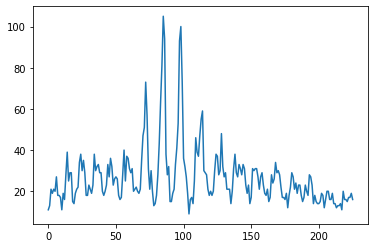

In [801]:
plt.plot(layer.data[plane, mask])

(0, 100)

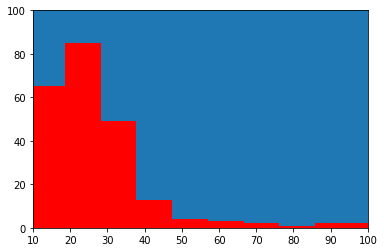

In [807]:
fig = plt.figure()
plt.hist(np.reshape(layer.data[plane, :, :], [-1]), 100)
plt.hist(layer.data[plane, mask], color = 'r')
plt.xlim(10, 100)
plt.ylim(0, 100)

In [806]:
layer.data[plane, mask]

array([ 11.,  13.,  21.,  19.,  21.,  20.,  27.,  18.,  18.,  17.,  11.,
        19.,  16.,  28.,  39.,  25.,  29.,  29.,  15.,  14.,  19.,  21.,
        22.,  34.,  38.,  30.,  35.,  29.,  18.,  18.,  23.,  21.,  19.,
        23.,  38.,  30.,  32.,  33.,  29.,  29.,  20.,  18.,  20.,  23.,
        33.,  27.,  36.,  32.,  23.,  26.,  27.,  26.,  18.,  16.,  17.,
        28.,  40.,  25.,  37.,  36.,  31.,  29.,  31.,  20.,  21.,  22.,
        20.,  19.,  21.,  35.,  47.,  51.,  73.,  57.,  31.,  21.,  30.,
        20.,  13.,  14.,  18.,  28.,  43.,  63.,  81., 105.,  94.,  38.,
        28.,  32.,  15.,  15.,  19.,  21.,  33.,  41.,  53.,  93., 100.,
        73.,  36.,  32.,  27.,  19.,   9.,  16.,  17.,  14.,  25.,  46.,
        39.,  37.,  47.,  55.,  59.,  30.,  29.,  28.,  21.,  18.,  20.,
        18.,  20.,  30.,  38.,  37.,  28.,  30.,  48.,  32.,  27.,  29.,
        21.,  21.,  21.,  14.,  20.,  31.,  38.,  29.,  27.,  33.,  31.,
        28.,  33.,  31.,  23.,  19.,  23.,  14.,  1

# View saved masks

In [22]:
with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
    pkl.dump(Cell.cell_data, f)

In [60]:
Cell.n_cells

In [58]:
indices = list(Cell.cell_data.keys())
Cell.cell_data[indices[-1]]

{'cell_id': 138,
 'z_planes': [5, 6],
 'masks': {5: array([[ 1792.17393846, 10372.95009818],
         [ 1789.68810237, 10383.72205456],
         [ 1796.59320261, 10392.28437886],
         [ 1805.43173093, 10399.74188713],
         [ 1817.30850335, 10404.16115128],
         [ 1832.77592789, 10407.19939539],
         [ 1845.20510833, 10414.65690365],
         [ 1855.97706471, 10403.60874326],
         [ 1852.66261659, 10388.41752273],
         [ 1845.48131234, 10375.15973026],
         [ 1835.814172  , 10366.87360997],
         [ 1826.14703166, 10363.00675383],
         [ 1818.41331938, 10360.24471373],
         [ 1805.70793494, 10359.96850972],
         [ 1800.46005875, 10362.73054982],
         [ 1800.46005875, 10362.73054982]]),
  6: array([[ 1806.81275097, 10392.28437886],
         [ 1815.09887127, 10401.6753152 ],
         [ 1824.76601161, 10409.13282346],
         [ 1832.49972388, 10409.13282346],
         [ 1839.68102814, 10400.29429515],
         [ 1840.50964016, 10385.37927862],

In [52]:
cell1.masks

{0: array([[ 2503.06063306, 11088.27194031],
        [ 2500.96184674, 11094.14854202],
        [ 2499.28281768, 11105.06223091],
        [ 2499.70257495, 11113.03761894],
        [ 2512.29529289, 11115.55616253],
        [ 2521.52995272, 11117.65494886],
        [ 2531.60412708, 11117.23519159],
        [ 2545.45611683, 11113.45737621],
        [ 2555.11053392, 11108.42028903],
        [ 2559.30810657, 11098.34611467],
        [ 2562.66616469, 11088.69169757],
        [ 2558.88834931, 11078.61752322],
        [ 2548.81417495, 11073.58043604],
        [ 2542.93757324, 11071.06189245],
        [ 2529.50534076, 11071.06189245],
        [ 2521.11019546, 11075.2594651 ],
        [ 2507.67796298, 11078.61752322]]),
 1: array([[ 2497.60378862, 11095.82757108],
        [ 2495.5050023 , 11108.00053176],
        [ 2503.48039033, 11113.03761894],
        [ 2513.55456469, 11113.45737621],
        [ 2525.30776811, 11114.716648  ],
        [ 2537.06097153, 11113.03761894],
        [ 2545.03635956, 1

In [143]:
# Check number of masks per cell, and variance of mask centers
indices = list(Cell.cell_data.keys())
n_planes = np.zeros(len(indices)).astype(int)
var_masks = np.zeros([len(indices), 2])

if not np.max(indices) == len(indices):
    print('Re-numbering cells to be consecutive')
    Cell.cell_data_temp = {}
    for i in range(len(indices)):
        Cell.cell_data_temp[i + 1] = Cell.cell_data[indices[i]]
        Cell.cell_data_temp[i + 1]['cell_id'] = i + 1
    Cell.cell_data = Cell.cell_data_temp 
    with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(Cell.cell_data, f)
        
for i in range(len(indices)):
    z_planes = Cell.cell_data[i + 1]['z_planes']
    n_planes[i] = len(z_planes)
    masks = Cell.cell_data[i + 1]['masks']
    centers = np.zeros([n_planes[i], 2])
    for j in range(n_planes[i]):
        centers[j, 0] = np.mean(masks[z_planes[j]][:, 0])
        centers[j, 1] = np.mean(masks[z_planes[j]][:, 1])
    var_masks[i, 0] = np.var(centers[:, 0])
    var_masks[i, 1] = np.var(centers[:, 1])
    
    

Re-numbering cells to be consecutive


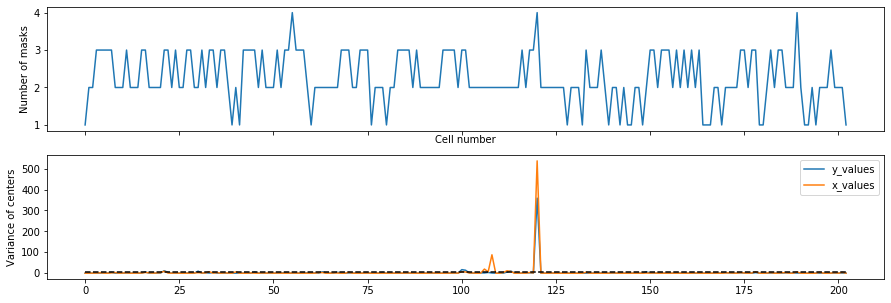

In [144]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = [15, 5])
ax[0].plot(n_planes)
ax[0].set_xlabel('Cell number')
ax[0].set_ylabel('Number of masks')
ax[1].plot(var_masks[:, 0], label = 'y_values')
ax[1].plot(var_masks[:, 1], label = 'x_values')
ax[1].set_ylabel('Variance of centers')
ax[1].plot(range(len(indices)), np.ones(len(indices))*8, '--', color = 'k')
ax[1].legend()

In [145]:
ind = np.nonzero(var_masks > 50)[0]

In [146]:
ind

array([108, 120, 120], dtype=int64)

In [147]:
cell_no = ind[2] + 1
masks = Cell.cell_data[cell_no]['masks']
masks

{14: array([[763.45916438, 911.99920008],
        [758.9540603 , 911.99920008],
        [756.79944531, 913.17444462],
        [755.23245258, 915.91668188],
        [755.23245258, 921.00940823],
        [755.82007485, 926.68975685],
        [759.54168257, 926.10213458],
        [762.47979393, 924.53514186],
        [765.61377937, 922.77227505],
        [767.37664619, 919.6382896 ],
        [767.96426846, 915.13318552],
        [767.57252028, 913.17444462]]),
 15: array([[799.6958711 , 865.38116656],
        [796.95363384, 866.16466292],
        [794.79901884, 868.51515201],
        [792.44852976, 870.08214473],
        [792.84027794, 874.19550063],
        [794.79901884, 876.9377379 ],
        [797.34538202, 878.30885653],
        [799.6958711 , 877.91710835],
        [801.65461201, 875.76249335],
        [803.61335291, 873.60787836],
        [805.18034563, 871.45326336],
        [805.18034563, 866.7522852 ],
        [804.78859745, 865.18529247],
        [804.00510109, 864.40179611]]),


In [120]:
Cell.cell_data.pop(cell_no)

{'cell_id': 30,
 'z_planes': [16, 17, 15],
 'masks': {16: array([[1080.85613872,  561.65899275],
         [1077.43598525,  561.45780725],
         [1074.21701728,  562.26254925],
         [1072.80871879,  564.87796072],
         [1076.22887226,  568.70048519],
         [1079.64902573,  572.32182416],
         [1081.86206621,  574.33367914],
         [1084.67866318,  574.13249364],
         [1086.48933267,  571.71826766],
         [1087.49526016,  568.29811419],
         [1086.69051816,  565.48151722],
         [1086.08696167,  564.27440423],
         [1085.48340517,  563.26847674]]),
  17: array([[1083.87392119,  563.06729124],
         [1079.24665473,  562.66492024],
         [1074.01583178,  562.86610574],
         [1070.79686381,  565.88388821],
         [1069.99212181,  568.70048519],
         [1072.0039768 ,  572.92538065],
         [1076.83242875,  574.93723563],
         [1080.45376772,  575.13842113],
         [1083.47155019,  574.53486464],
         [1085.68459067,  572.925380

## View saved masks in new napari window

In [326]:
# Open image in napari viewer - each channel as a separate layer 
viewer2 = napari.Viewer()

viewer2.add_image(im_array2[:, :, :], name = 'Channel {0}'.format(i + 1), colormap = 'viridis', 
                     interpolation = 'nearest')
    
indices = list(Cell.cell_data.keys())
viewer2.add_shapes(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)
mask_layer = viewer2.layers['Shapes']
for cell in indices:
    plane = Cell.cell_data[cell]['z_planes'][0]
    mask = Cell.cell_data[cell]['masks'][plane]
    mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vispy\visuals\markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\py365\lib\site-packages\vis

In [303]:
mask_layer.add()

{1: {'cell_id': 1,
  'z_planes': [1],
  'masks': {1: array([[1203.88111044,  337.39930311],
          [1200.28185564,  338.59905471],
          [1197.08251804,  342.39826811],
          [1195.68280784,  345.19768851],
          [1199.28206264,  347.79715031],
          [1203.08127604,  349.59677772],
          [1206.88048944,  350.39661212],
          [1209.47995124,  348.99690192],
          [1211.47953724,  346.59739871],
          [1211.27957864,  342.99814391],
          [1208.48015824,  339.19893051],
          [1207.68032384,  338.19913751]])},
  'no_planes': 1,
  'c_vals': array([0.])},
 2: {'cell_id': 2,
  'z_planes': [1, 2],
  'masks': {1: array([[1211.33317027,  392.72244235],
          [1208.9794914 ,  393.21279212],
          [1208.48914163,  394.87998132],
          [1208.88142144,  398.41049963],
          [1209.96019093,  401.64680808],
          [1211.72545008,  403.41206723],
          [1214.17719891,  404.39276676],
          [1216.92315759,  405.47153624],
          

# Find cortex surface and calculate depths

In [9]:
with open('F:/HCR/HCR_10.17/S2_depths.pkl', 'rb') as f:
    depths = pkl.load(f)

In [13]:
# Find centroid of each cell mask
centers = np.zeros([Cell.n_cells, 2])
med_planes = np.zeros(Cell.n_cells)

for cell in range(Cell.n_cells):
    
    cell_id = cell + 1
    planes = Cell.cell_data[cell_id]['z_planes']
    med_planes[cell] = int(np.median(planes))
    
    mask = Cell.cell_data[cell_id]['masks'][med_planes[cell]]
    centers[cell, :] = np.mean(mask, 0).astype(int)

In [14]:
def find_depth(d1, d2, cell_center): #d1 and d2 are two points on the surface closest to the cell center
    
    dx = d2[0] - d1[0]
    dy = d2[1] - d1[1]
    d1_cell_x = cell_center[0] - d1[0]
    d1_cell_y = cell_center[1] - d1[1]
    t = (dx * d1_cell_x + dy * d1_cell_y) / (dx * dx + dy * dy)
    px = d1[0] + t * dx # Projection of cell center onto line joining d1 and d2
    py = d1[1] + t * dy
    depth = np.linalg.norm([px - cell_center[0], py - cell_center[1]])
    return depth


In [16]:
um_per_px = 0.19

(array([1., 0., 0., 1., 1., 3., 6., 7., 7., 4., 5., 6., 9., 3., 8., 6., 6.,
        5., 9., 3., 7., 3., 2., 4., 4., 6., 8., 1., 6., 8., 7., 7., 7., 6.,
        4., 8., 9., 8., 5., 3., 7., 8., 4., 3., 3., 1., 4., 3., 3., 1.]),
 array([ 10.00125855,  14.51361409,  19.02596964,  23.53832518,
         28.05068073,  32.56303627,  37.07539182,  41.58774736,
         46.10010291,  50.61245845,  55.124814  ,  59.63716955,
         64.14952509,  68.66188064,  73.17423618,  77.68659173,
         82.19894727,  86.71130282,  91.22365836,  95.73601391,
        100.24836945, 104.760725  , 109.27308054, 113.78543609,
        118.29779163, 122.81014718, 127.32250272, 131.83485827,
        136.34721382, 140.85956936, 145.37192491, 149.88428045,
        154.396636  , 158.90899154, 163.42134709, 167.93370263,
        172.44605818, 176.95841372, 181.47076927, 185.98312481,
        190.49548036, 195.0078359 , 199.52019145, 204.03254699,
        208.54490254, 213.05725808, 217.56961363, 222.08196918,
      

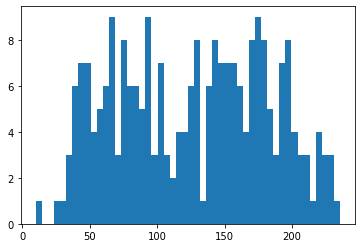

In [17]:
# Draw surface and calculate depths
surface = viewer.layers['masks'].data[-1]
depths = np.zeros(Cell.n_cells)

for cell in range(Cell.n_cells):
    distances = np.linalg.norm(centers[cell, :] - surface, axis = 1)
    order = np.argsort(distances)
    [p1, p2] = order[0:2]
    d1 = surface[p1]
    d2 = surface[p2]
    depths[cell] = find_depth(d1, d2, centers[cell, :])
depths = depths*um_per_px
with open('F:/HCR/HCR_10.17/S2_depths.pkl', 'wb') as f:
    pkl.dump(depths, f)
plt.figure()
plt.hist(depths, 50)

In [35]:
max_depth = 120
all_cells = np.array(range(Cell.n_cells))
cell_ids = all_cells[depths < max_depth]

avg_intensity_shallow_ndnf = avg_intensity_ndnf[cell_ids]
avg_intensity_shallow_vip = avg_intensity_vip[cell_ids]
avg_intensity_shallow_sst = avg_intensity_sst[cell_ids]

In [36]:
plt.figure()
gene1_level = avg_intensity_shallow_ndnf
gene2_level = avg_intensity_shallow_vip
gene1_level_all = avg_intensity_ndnf
gene2_level_all = avg_intensity_vip

plt.scatter(gene1_level/np.max(gene1_level_all), gene2_level/np.max(gene2_level_all), 
            color = 'k', marker = 'o',
           alpha = 0.2)


plt.xlabel('Relative expression of Ndnf')
plt.ylabel('Relative expression of Vip')

t1 = 0.4
t2 = 0.2

n_cells = cell_ids.shape[0]
plt.plot(np.ones(2)*t1, np.array(range(0, 2)), '--', color = 'r')
plt.plot(np.array(range(0, 2)), np.ones(2)*t2, '--',  color = 'r')

q1 = np.sum(np.logical_and(gene1_level/np.max(gene1_level_all) < t1, 
                    gene2_level/np.max(gene2_level_all) < t2))
plt.text(0, 0, '{0} %'.format(np.round(q1/n_cells*100, decimals = 0)), fontsize = 12)

q2 = np.sum(np.logical_and(gene1_level/np.max(gene1_level_all) < t1, 
                    gene2_level/np.max(gene2_level_all) > t2))
plt.text(0, 1, '{0} %'.format(np.round(q2/n_cells*100, decimals = 0)), fontsize = 12)

q3 = np.sum(np.logical_and(gene1_level/np.max(gene1_level_all) > t1, 
                    gene2_level/np.max(gene2_level_all) < t2))
plt.text(0.8, 0, '{0} %'.format(np.round(q3/n_cells*100, decimals = 0)), fontsize = 12)

q4 = np.sum(np.logical_and(gene1_level/np.max(gene1_level_all) > t1, 
                    gene2_level/np.max(gene2_level_all) > t2))
plt.text(0.8, 1, '{0} %'.format(np.round(q4/n_cells*100, decimals = 0)), fontsize = 12)

Text(0.8, 1, '0.0 %')

In [31]:
%matplotlib qt

In [39]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))

ax[0].scatter(depths, avg_intensity_ndnf, color = 'k', alpha = 0.5)
ax[0].set_title('Ndnf intensity vs depth')

ax[1].scatter(depths, avg_intensity_vip, color = 'k', alpha = 0.5)
ax[1].set_title('Vip intensity vs depth')

ax[2].scatter(depths, avg_intensity_sst, color = 'k', alpha = 0.5)
ax[2].set_title('Sst intensity vs depth')

Text(0.5, 1.0, 'Sst intensity vs depth')

Text(0.5, 1.0, 'Max intensity = 28136')

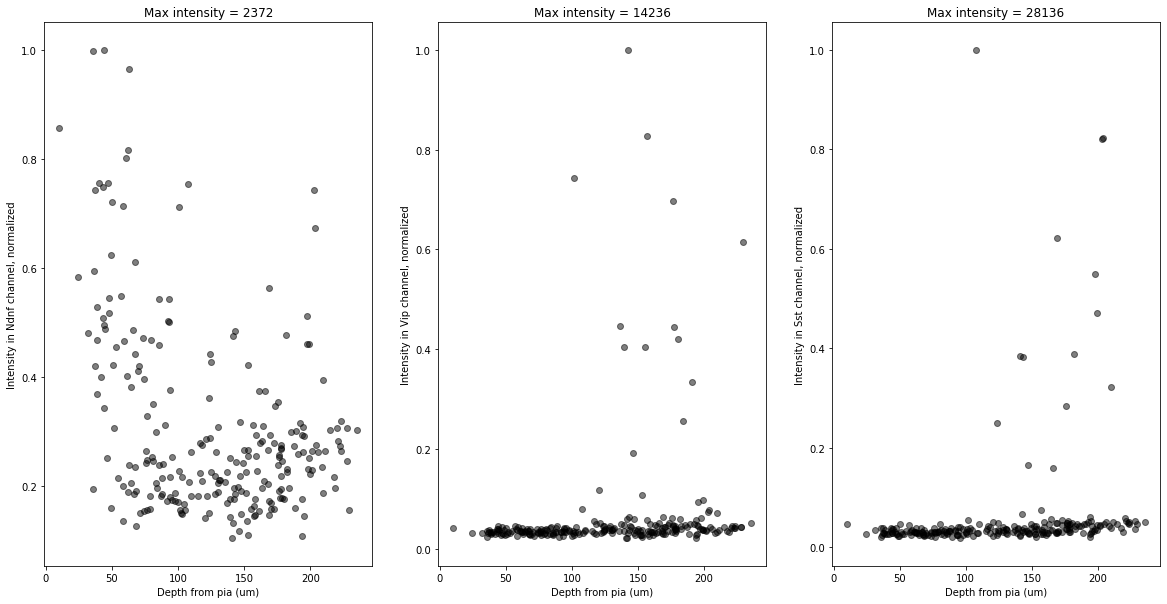

In [10]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))

ax[0].scatter(depths, avg_intensity_ndnf/np.max(avg_intensity_ndnf), color = 'k', alpha = 0.5)
ax[0].set_xlabel('Depth from pia (um)')
ax[0].set_ylabel('Intensity in Ndnf channel, normalized')
ax[0].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_ndnf))))

ax[1].scatter(depths, avg_intensity_vip/np.max(avg_intensity_vip), color = 'k', alpha = 0.5)
ax[1].set_xlabel('Depth from pia (um)')
ax[1].set_ylabel('Intensity in Vip channel, normalized')
ax[1].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_vip))))

ax[2].scatter(depths, avg_intensity_sst/np.max(avg_intensity_sst), color = 'k', alpha = 0.5)
ax[2].set_xlabel('Depth from pia (um)')
ax[2].set_ylabel('Intensity in Sst channel, normalized')
ax[2].set_title('Max intensity = {0}'.format(int(np.max(avg_intensity_sst))))

# View raw images of each cell

In [13]:
%matplotlib qt

In [20]:
plt.close('all')

In [112]:
gene = 'sst'

if gene == 'sst':
    im_array = im_array_sst
    cell_order = np.argsort(avg_intensity_sst - ci_sst - avg_bg_sst)
    ylabel = pv_sst
elif gene == 'vip':
    im_array = im_array_vip
    cell_order = np.argsort(avg_intensity_vip - ci_vip - avg_bg_vip)
    ylabel = pv_vip
elif gene == 'ndnf':
    im_array = im_array_ndnf
    cell_order = np.argsort(avg_intensity_ndnf - ci_ndnf - avg_bg_ndnf)
    ylabel = pv_ndnf
    
n_rows = 10
n_cols = 24
plt.style.use('dark_background')
fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (30, 20))


size_um = 20 # In um
um_per_px = 0.19 # Size of a pixel in um

size_px = int(size_um/um_per_px/2)
mask_dil =  np.zeros([h, w]).astype(bool)

max_intensity = np.max(im_array)/15
min_intensity = np.min(im_array)

for cell in range(Cell.n_cells):
    
    row = int(cell/n_cols)
    col = np.mod(cell, n_cols)
    
    cell_id = cell_order[cell] + 1
    
    planes = Cell.cell_data[cell_id]['z_planes']
    med_plane = int(np.median(planes))
    
    mask = Cell.cell_data[cell_id]['masks'][med_plane]
    [x_center, y_center] = np.mean(mask, 0).astype(int)
    [x1, y1] = [np.max([0, x_center - size_px]), np.max([0, y_center - size_px])]
    [x2, y2] = [np.min([h, x_center + size_px]), np.min([w, y_center + size_px])]
    mask_dil[x1:x2, y1:y2] = np.ones([x2 - x1, y2 - y1])
    
    small_im = np.reshape(im_array[med_plane, mask_dil], [np.min([x2 - x1, size_px*2]), np.min([y2 - y1, size_px*2])])
    ax[row, col].imshow(small_im, vmin = min_intensity, vmax = max_intensity)
    
    mask_dil[x1:x2, y1:y2] = np.zeros([x2 - x1, y2 - y1])
    
    ax[row, col].axis('off')
    if col == 0:
        ax[row, col].set_ylabel('{0}'.format(np.round(ylabel[cell_id - 1], 3)))
        ax[row, col].axis('on')

# Local background correction

## Define background pixels

In [9]:
# All pixels not contained in any cell mask
bg_all = np.ones([n, h, w])
n_vert_all = {}
centers = {}

no_cells = len(Cell.cell_data.keys())
for cell in range(no_cells):
        
    cell_no = cell + 1
    cell_dict = Cell.cell_data[cell_no]
    z_planes = cell_dict['z_planes']
    n_vert_all[cell] = {}
    centers[cell] = {}
    
    for plane in z_planes:
        
        xy_coord = mask_vertices[cell_no][plane]
        x = xy_coord[0]
        y = xy_coord[1]
        z = plane
        centers[cell][plane] = np.array([np.mean(x), np.mean(y)]).astype(int)
        
        
        bg_all[z, x, y] = np.zeros([1, len(x)])
        
        n_vert_all[cell][plane] = len(x) 

## Calculate local background for each cell

In [74]:
with open('F:/HCR/HCR_10.17/S2_background_ndnf_sst_vip.pkl', 'rb') as f:
    dict = pkl.load(f)
avg_bg_ndnf = dict['Ndnf'] 
avg_bg_sst = dict['Sst']  
avg_bg_vip = dict['Vip'] 

In [25]:
# fig, ax = plt.subplots(nrows = 3, ncols = 20)
um_per_px = 0.19
no_cells = len(Cell.cell_data.keys())
avg_bg_ndnf = np.zeros(no_cells)
avg_bg_vip = np.zeros(no_cells)
avg_bg_sst = np.zeros(no_cells)

local_region = 50 # in um
local_px = int(local_region/um_per_px/2)

min_dist = 10 # in um
min_dist_px = min_dist/um_per_px

for cell in range(no_cells):
    cell_no = cell + 1
    cell_dict = Cell.cell_data[cell_no]
    z_planes = cell_dict['z_planes']

    bg_ndnf = np.zeros(len(z_planes))
    bg_vip = np.zeros(len(z_planes))
    bg_sst = np.zeros(len(z_planes))

    p = 0
    for plane in z_planes:

        center = centers[cell][plane]
        n_verts = n_vert_all[cell][plane]

        x1 = np.max([0, center[0] - local_px])
        x2 = np.min([h, center[0] + local_px])
        y1 = np.max([0, center[1] - local_px])
        y2 = np.min([w, center[1] + local_px])

        center_local = [local_px, local_px]

        local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)
        local_im_ndnf = im_array_ndnf[plane, x1:x2, y1:y2]
        local_im_sst = im_array_sst[plane, x1:x2, y1:y2]
        local_im_vip = im_array_vip[plane, x1:x2, y1:y2]
        local_im = im_array[plane, x1:x2, y1:y2]

#         ax[0, cell].imshow(local_im, vmin = np.min(local_im), vmax = np.max(local_im)/2)

#         ax[1, cell].imshow(local_bg)
        
        verts = np.array(np.where(local_bg))
        dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), axis = 0)
        verts = verts[:, dist_from_center > min_dist_px]
        dist_from_center = dist_from_center[dist_from_center > min_dist_px]
        
        order = np.argsort(dist_from_center)
        n_verts = np.min([n_verts, len(order)])
        
        x_bg = verts[0][order[0:n_verts]]
        y_bg = verts[1][order[0:n_verts]]

        local_bg = np.zeros(local_bg.shape).astype(bool)
        local_bg[x_bg, y_bg] = np.ones(n_verts)

#         ax[2, cell].imshow(local_bg)

        bg_ndnf[p] = np.mean(local_im_ndnf[local_bg])
        bg_vip[p] = np.mean(local_im_vip[local_bg])
        bg_sst[p] = np.mean(local_im_sst[local_bg])

        p += 1



    avg_bg_ndnf[cell] = np.mean(bg_ndnf)
    avg_bg_vip[cell] = np.mean(bg_vip)
    avg_bg_sst[cell] = np.mean(bg_sst)
    
with open('F:/HCR/HCR_10.17/S2_background_ndnf_sst_vip.pkl', 'wb') as f:
    pkl.dump({'Ndnf': avg_bg_ndnf, 'Sst': avg_bg_sst, 'Vip':avg_bg_vip}, f)

# Use background to estimate significance of signal

## Calculate p value and 95% confidence interval for each cell by bootstrapping background

In [100]:
with open('F:/HCR/HCR_10.17/S2_p_values_ndnf_sst_vip.pkl', 'rb') as f:
    d = pkl.load(f)
pv_ndnf = d['Ndnf']
pv_sst = d['Sst']
pv_vip = d['Vip']

In [75]:
n_sample = 1000 # Number of samples to calculate bootstrap confidence interval
p_value = 0.05 # Threshold for calling signal significantly different from background

no_cells = len(Cell.cell_data.keys())

ci_ndnf = np.zeros(no_cells)
ci_vip = np.zeros(no_cells)
ci_sst = np.zeros(no_cells)

pv_ndnf = np.zeros(no_cells)
pv_vip = np.zeros(no_cells)
pv_sst = np.zeros(no_cells)

um_per_px = 0.19

local_region = 50 # in um
local_px = int(local_region/um_per_px/2)

min_dist = 10 # in um
min_dist_px = min_dist/um_per_px

for cell in range(no_cells):

    if np.mod(cell, 10) == 0:
        print('Cell {0}'.format(cell))
        
    cell_no = cell + 1
    cell_dict = Cell.cell_data[cell_no]
    z_planes = cell_dict['z_planes']
    
    bs_means = np.zeros([n_sample, 3, len(z_planes)])
    p = 0
    
    for plane in z_planes:

        center = centers[cell][plane]
        n_verts = n_vert_all[cell][plane]

        x1 = np.max([0, center[0] - local_px])
        x2 = np.min([h, center[0] + local_px])
        y1 = np.max([0, center[1] - local_px])
        y2 = np.min([w, center[1] + local_px])

        center_local = [local_px, local_px]

        local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)

        verts = np.array(np.where(local_bg))
        dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), 
                                          axis = 0)
        verts = verts[:, dist_from_center > min_dist_px]
        dist_from_center = dist_from_center[dist_from_center > min_dist_px]

        order = np.argsort(dist_from_center)
        # Take 4x the number of pixels in the mask of the cell, for local background - it will still be local but you'll
        # get a better estimate of background by averaging over more pixels.
        n_verts_bg = np.min([4*n_verts, len(order)])

        verts = verts[:, order[0:n_verts_bg]]
        samples = np.random.choice(np.linspace(0, n_verts_bg - 1, n_verts_bg).astype(int), 
                                   (n_verts, n_sample), replace = True)
        x_bs = verts[0][samples]
        y_bs = verts[1][samples]

        local_im_ndnf = im_array_ndnf[plane, x1:x2, y1:y2]
        local_im_sst = im_array_sst[plane, x1:x2, y1:y2]
        local_im_vip = im_array_vip[plane, x1:x2, y1:y2]


        local_bg_bs = np.zeros([x2 - x1, y2 - y1]).astype(bool)
        for s in range(n_sample):
            local_bg_bs[x_bs[:, s], y_bs[:, s]] = np.ones(n_verts)
            bs_means[s, 0, p] = np.mean(local_im_ndnf[local_bg_bs])
            bs_means[s, 1, p] = np.mean(local_im_vip[local_bg_bs])
            bs_means[s, 2, p] = np.mean(local_im_sst[local_bg_bs])

        p += 1

        pv_ndnf[cell] = np.sum(bs_means[:, 0, :] > avg_intensity_ndnf[cell] - avg_bg_ndnf[cell])/n_sample/len(z_planes)
        pv_vip[cell] = np.sum(bs_means[:, 1, :] > avg_intensity_vip[cell] - avg_bg_vip[cell])/n_sample/len(z_planes)
        pv_sst[cell] = np.sum(bs_means[:, 2, :] > avg_intensity_sst[cell] - avg_bg_sst[cell])/n_sample/len(z_planes)
        
        ci_ndnf[cell] = np.mean(np.percentile(bs_means[:, 0, :], (1 - p_value)*100, axis = 0))
        ci_vip[cell] = np.mean(np.percentile(bs_means[:, 1, :], (1 - p_value)*100, axis = 0))
        ci_sst[cell] = np.mean(np.percentile(bs_means[:, 2, :], (1 - p_value)*100, axis = 0))

with open('F:/HCR/HCR_10.17/S2_confidence_intervals_ndnf_sst_vip.pkl', 'wb') as f:
    pkl.dump({'Ndnf': ci_ndnf, 'Sst': ci_sst, 'Vip':ci_vip}, f)
    
with open('F:/HCR/HCR_10.17/S2_p_values_ndnf_sst_vip.pkl', 'wb') as f:
    pkl.dump({'Ndnf': pv_ndnf, 'Sst': pv_sst, 'Vip':pv_vip}, f)

Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130
Cell 140
Cell 150
Cell 160
Cell 170
Cell 180
Cell 190
Cell 200
Cell 210
Cell 220
Cell 230


In [113]:
cell_order = np.argsort(avg_intensity_sst - avg_bg_sst - ci_sst)

plt.figure()
plt.plot(pv_sst[cell_order], marker = 'o')

In [115]:
24*9

216

In [114]:
214/24

8.916666666666666

### Try larger sample size on cells near boundary of ROC curve

In [103]:
n_sample = 10000 # Number of samples to calculate bootstrap confidence interval

cell_order = np.argsort(avg_intensity_ndnf - avg_bg_ndnf - ci_ndnf)
# Choose cells near boundary of ROC curve by looking at sorted signal - noise
cell1 = 160
cell2 = 175
no_cells = cell2 - cell1
pv_ndnf2 = np.zeros(no_cells)
pv_vip2 = np.zeros(no_cells)
pv_sst2 = np.zeros(no_cells)

um_per_px = 0.19

local_region = 50 # in um
local_px = int(local_region/um_per_px/2)

min_dist = 10 # in um
min_dist_px = min_dist/um_per_px

for cell in range(cell1, cell2):

    
    print('Cell {0}'.format(cell))
        
    cell_no = cell_order[cell] + 1
    cell_dict = Cell.cell_data[cell_no]
    z_planes = cell_dict['z_planes']
    
    bs_means = np.zeros([n_sample, 3, len(z_planes)])
    p = 0
    
    for plane in z_planes:

        center = centers[cell_order[cell]][plane]
        n_verts = n_vert_all[cell_order[cell]][plane]

        x1 = np.max([0, center[0] - local_px])
        x2 = np.min([h, center[0] + local_px])
        y1 = np.max([0, center[1] - local_px])
        y2 = np.min([w, center[1] + local_px])

        center_local = [local_px, local_px]

        local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)

        verts = np.array(np.where(local_bg))
        dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), 
                                          axis = 0)
        verts = verts[:, dist_from_center > min_dist_px]
        dist_from_center = dist_from_center[dist_from_center > min_dist_px]

        order = np.argsort(dist_from_center)
        # Take 4x the number of pixels in the mask of the cell, for local background - it will still be local but you'll
        # get a better estimate of background by averaging over more pixels.
        n_verts_bg = np.min([4*n_verts, len(order)])

        verts = verts[:, order[0:n_verts_bg]]
        samples = np.random.choice(np.linspace(0, n_verts_bg - 1, n_verts_bg).astype(int), 
                                   (n_verts, n_sample), replace = True)
        x_bs = verts[0][samples]
        y_bs = verts[1][samples]

        local_im_ndnf = im_array_ndnf[plane, x1:x2, y1:y2]
        local_im_sst = im_array_sst[plane, x1:x2, y1:y2]
        local_im_vip = im_array_vip[plane, x1:x2, y1:y2]


        local_bg_bs = np.zeros([x2 - x1, y2 - y1]).astype(bool)
        for s in range(n_sample):
            local_bg_bs[x_bs[:, s], y_bs[:, s]] = np.ones(n_verts)
            bs_means[s, 0, p] = np.mean(local_im_ndnf[local_bg_bs])
            bs_means[s, 1, p] = np.mean(local_im_vip[local_bg_bs])
            bs_means[s, 2, p] = np.mean(local_im_sst[local_bg_bs])

        p += 1

        pv_ndnf2[cell - cell1] = np.sum(bs_means[:, 0, :] > avg_intensity_ndnf[cell_order[cell]] - avg_bg_ndnf[cell_order[cell]])/n_sample/len(z_planes)
        pv_vip2[cell - cell1] = np.sum(bs_means[:, 1, :] > avg_intensity_vip[cell_order[cell]] - avg_bg_vip[cell_order[cell]])/n_sample/len(z_planes)
        pv_sst2[cell - cell1] = np.sum(bs_means[:, 2, :] > avg_intensity_sst[cell_order[cell]] - avg_bg_sst[cell_order[cell]])/n_sample/len(z_planes)
        

# with open('F:/HCR/HCR_10.17/S2_p_values_ndnf_sst_vip.pkl', 'wb') as f:
#     pkl.dump({'Ndnf': pv_ndnf, 'Sst': pv_sst, 'Vip':pv_vip}, f)

Cell 160
Cell 161
Cell 162
Cell 163
Cell 164
Cell 165
Cell 166
Cell 167
Cell 168
Cell 169
Cell 170
Cell 171
Cell 172
Cell 173
Cell 174


In [104]:
plt.figure()
plt.plot(pv_ndnf2)

# Exclude lipofuscin pixels

## View FISH section in napari and draw ROIs around lipofuscin pixels

In [25]:
viewer2 = napari.Viewer()
viewer2.add_image(im_array, name = 'Gad1', colormap = 'cyan')
viewer2.add_image(im_array_ndnf, name = 'Ndnf', colormap = 'magenta')
viewer2.add_image(im_array_vip, name = 'Vip', colormap = 'yellow')
viewer2.add_image(im_array_sst, name = 'Sst', colormap = 'green')

<Image layer 'Sst' at 0x218052c0d08>

In [26]:
#save_loc = 'Z:\\users\\Amrita\\HCR\\HCR_10.17'
# save_file= 'S2_lipofuscin_rois.pkl'

save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17'
save_file = 'HCR_10.17_S2_lipofuscin_rois.pkl'

with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
    l_rois = pkl.load(f)
    
n_rois = len(l_rois)
print('{0} rois found'.format(n_rois))

viewer2.add_shapes(l_rois, name = 'Lipofuscin ROIs',
                   shape_type = 'polygon', opacity = 0.2, face_color = 'white', 
                   edge_color = 'red', edge_width = 3)

19 rois found


<Shapes layer 'Lipofuscin ROIs' at 0x21807c0c548>

In [27]:
# Draw more ROIs and save

l_rois = viewer2.layers['Lipofuscin ROIs'].data
n_rois = len(l_rois)
print('{0} ROIs'.format(n_rois))

with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
    pkl.dump(l_rois, f)

19 ROIs


## Find lipofuscin pixels within ROI boundaries

In [20]:
try:
    with open('{0}\\S2_lipo_mask_vertices.pkl'.format(save_loc), 'rb') as f:
        mask_vertices = pkl.load(f)
        all_lipo_pixels = mask_vertices['all_lipo_pixels']
        lipo_pixels_roi = mask_vertices['lipo_pixels_roi']
        print('Data loaded')
        
except IOError:
    print('No saved data found, calculating mask pixels')
    xv = range(w)
    yv = range(h)
    coord_array = np.array(np.meshgrid(xv, yv))

    points = np.zeros([h*w, 2])
    p = 0
    for i in range(h):
        for j in range(w):
            points[p, 1] = coord_array[0, i, j]
            points[p, 0] = coord_array[1, i, j]
            p += 1

    lipo_pixels_roi = {}
    for roi in range(n_rois):
        print('ROI {0}'.format(roi))
        vertices = l_rois[roi][:, 1:]
        path = mpltpath.Path(vertices)
        mask = path.contains_points(points)
        mask = np.reshape(mask, [h, w])
        lipo_pixels_roi[roi] = np.where(mask)

    all_lipo_pixels = np.empty((1, 2))
    for roi in range(n_rois):
        n_px = len(lipo_pixels_roi[roi][0])
        xvals = np.reshape(lipo_pixels_roi[roi][0], (n_px, 1)) 
        yvals = np.reshape(lipo_pixels_roi[roi][1], (n_px, 1))
        coords = np.concatenate((xvals, yvals), axis = 1)
        all_lipo_pixels = np.concatenate((all_lipo_pixels, coords))
    
    all_lipo_pixels = all_lipo_pixels.astype(int)
        
    with open('{0}\\S2_lipo_mask_vertices.pkl'.format(save_loc), 'wb') as f:
        pkl.dump({'lipo_pixels_roi': lipo_pixels_roi, 'all_lipo_pixels': all_lipo_pixels}, f)

Data loaded


## Find intensity in each channel for lipofuscin pixels

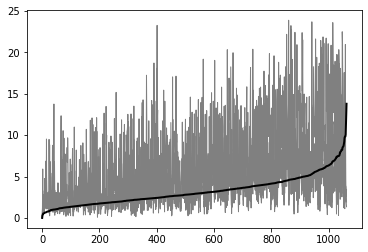

In [21]:
xvals = np.squeeze(all_lipo_pixels[:, 0]).astype(int)
yvals = np.squeeze(all_lipo_pixels[:, 1]).astype(int)

im_array = np.squeeze(im_array)
im_array_ndnf = np.squeeze(im_array_ndnf)
im_array_vip = np.squeeze(im_array_vip)
im_array_sst = np.squeeze(im_array_sst)

lipo_gad1 = im_array[(0, xvals, yvals)]
lipo_ndnf = im_array_ndnf[(0, xvals, yvals)]
lipo_vip = im_array_vip[(0, xvals, yvals)]
lipo_sst = im_array_sst[(0, xvals, yvals)]

mean_gad1 = np.mean(im_array)
mean_ndnf = np.mean(im_array_ndnf)
mean_vip = np.mean(im_array_vip)
mean_sst = np.mean(im_array_sst)

order = np.argsort(lipo_gad1)

plt.figure()
plt.plot(lipo_vip[order]/mean_vip, color = 'gray', linewidth = 1)
plt.plot(lipo_sst[order]/mean_sst, color = 'gray', linewidth = 1)
plt.plot(lipo_ndnf[order]/mean_ndnf, color = 'gray', linewidth = 1)
plt.plot(lipo_gad1[order]/mean_gad1, color = 'k', linewidth = 2)


## Scatter intensity in all channels for lipofuscin and non lipofuscin pixels

In [121]:
# Draw a rectangle to select points, then get vertices
shapes = viewer2.layers['Lipofuscin ROIs'].data[-6:-3]

In [122]:
print(shapes)
print('{0} shapes'.format(len(shapes)))

[array([[   0.        , 1382.73168356, 1576.37353317],
       [   0.        , 1505.41050657, 1576.37353317],
       [   0.        , 1505.41050657, 1723.02408022],
       [   0.        , 1382.73168356, 1723.02408022]]), array([[   0.        ,  945.60024526, 1652.51900952],
       [   0.        , 1065.45886544, 1652.51900952],
       [   0.        , 1065.45886544, 1779.42813677],
       [   0.        ,  945.60024526, 1779.42813677]]), array([[   0.        , 1014.69521454, 2234.89089345],
       [   0.        , 1130.32353048, 2234.89089345],
       [   0.        , 1130.32353048, 2361.8000207 ],
       [   0.        , 1014.69521454, 2361.8000207 ]])]
3 shapes


In [9]:
shape = np.array([[   0.        ,  900.39009498, 1500.20585152],
       [   0.        , 1785.11186123, 1500.20585152],
       [   0.        , 1785.11186123, 4474.51670959],
       [   0.        ,  900.39009498, 4474.51670959]])

In [123]:
points_gad1 = np.empty(1)
points_ndnf = np.empty(1)
points_vip = np.empty(1)
points_sst = np.empty(1)

for i in range(len(shapes)):
    z = shapes[i][0, 0].astype(int)
    [x0, x1] = shapes[i][[0, 2], 2].astype(int)
    [y0, y1] = shapes[i][[0, 1], 1].astype(int)
    if x0 > x1: # Exchange x1 and x0
        x1 = x1 + x0
        x0 = x1 - x0
        x1 = x1 - x0
    if y0 > y1: # Exchange y1 and y0
        y1 = y1 + y0
        y0 = y1 - y0
        y1 = y1 - y0
    
    points_gad1 = np.concatenate([points_gad1, np.reshape(im_array[z, y0:y1, x0:x1], [-1])])
    points_ndnf = np.concatenate([points_ndnf,np.reshape(im_array_ndnf[z, y0:y1, x0:x1], [-1])])
    points_vip = np.concatenate([points_vip,np.reshape(im_array_vip[z, y0:y1, x0:x1], [-1])])
    points_sst = np.concatenate([points_sst,np.reshape(im_array_sst[z, y0:y1, x0:x1], [-1])])

In [102]:
%matplotlib qt

fig, ax = plt.subplots(nrows = 2, ncols = 2)

ax[0, 0].scatter(points_sst, points_ndnf, marker = '.', alpha = 0.1, label = 'All pixels', c = points_vip, cmap = 'autumn')
ax[0, 0].scatter(lipo_sst, lipo_ndnf, marker = '.', color = 'k', alpha = 0.5, label = 'Lipofuscin pixels', )
ax[0, 0].set_xlabel('Sst - 594', fontsize = 15)
ax[0, 0].set_ylabel('Ndnf - 647', fontsize = 15)
#ax[0, 0].set_title('Color = Vip intensity', size = 15)
ax[0, 0].legend()

ax[0, 1].scatter(points_gad1, points_vip, marker = '.', alpha = 0.1, label = 'All pixels', c = points_sst, cmap = 'autumn')
ax[0, 1].scatter(lipo_gad1, lipo_vip, marker = '.', color = 'k', alpha = 0.5, label = 'Lipofuscin pixels',)
ax[0, 1].set_xlabel('Gad1 - 514', fontsize = 15)
ax[0, 1].set_ylabel('Vip - 546', fontsize = 15)
#ax[0, 1].set_title('Color = Sst intensity', size = 15)

ax[1, 0].scatter(points_gad1, points_sst, marker = '.', alpha = 0.1, label = 'All pixels', c = points_ndnf, cmap = 'autumn')
ax[1, 0].scatter(lipo_gad1, lipo_sst, marker = '.', color = 'k', alpha = 0.5, label = 'Lipofuscin pixels',)
ax[1, 0].set_xlabel('Gad1 - 514', fontsize = 15)
ax[1, 0].set_ylabel('Sst - 594', fontsize = 15)
#ax[1, 0].set_title('Color = Ndnf intensity', size = 15)

ax[1, 1].scatter(points_sst, points_vip, marker = '.', alpha = 0.1, label = 'All pixels', c = points_ndnf, cmap = 'autumn')
ax[1, 1].scatter(lipo_sst, lipo_vip, marker = '.', color = 'k', alpha = 0.5, label = 'Lipofuscin pixels',)
ax[1, 1].set_xlabel('Sst - 594', fontsize = 15)
ax[1, 1].set_ylabel('Vip - 546', fontsize = 15)
#ax[1, 1].set_title('Color = Ndnf intensity', size = 15)

Text(0, 0.5, 'Vip - 546')

In [70]:
plt.savefig('{0}\\Scatter_lipo_all_channels.png'.format(save_loc))

In [119]:
plt.figure()
plt.scatter(points_ndnf, points_sst, color = 'b', label = 'All pixels', marker = '.', alpha = 0.3)
#plt.scatter(lipo_ndnf, lipo_sst, color = 'k', label = 'Lipofuscin pixels', marker = '.', alpha = 0.3)
plt.xlabel('Ndnf - 647')
plt.ylabel('Sst - 594')
plt.title('Pixel values in 594 vs 647 channels for unblurred images')
plt.legend()

In [114]:
plt.savefig('{0}\\Scatter_647_594_unblurred.png'.format(save_loc))

In [104]:
folder = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17'

In [124]:
blurred_sst_594 = np.array(Image.open('{0}\S2_sst_594_blurred.tif'.format(folder)))
blurred_ndnf_647 = np.array(Image.open('{0}\\S2_ndnf_647_blurred.tif'.format(folder)))

p_647 = np.empty(1)
p_594 = np.empty(1)

for i in range(len(shapes)):
    z = shapes[i][0, 0].astype(int)
    [x0, x1] = shapes[i][[0, 2], 2].astype(int)
    [y0, y1] = shapes[i][[0, 1], 1].astype(int)
    if x0 > x1: # Exchange x1 and x0
        x1 = x1 + x0
        x0 = x1 - x0
        x1 = x1 - x0
    if y0 > y1: # Exchange y1 and y0
        y1 = y1 + y0
        y0 = y1 - y0
        y1 = y1 - y0
    
    p_647 = np.concatenate([p_647, np.reshape(blurred_ndnf_647[y0:y1, x0:x1], [-1])])
    p_594 = np.concatenate([p_594, np.reshape(blurred_sst_594[y0:y1, x0:x1], [-1])])

xvals = np.squeeze(all_lipo_pixels[:, 0]).astype(int)
yvals = np.squeeze(all_lipo_pixels[:, 1]).astype(int)

l_647 = blurred_ndnf_647[(xvals, yvals)]
l_594 = blurred_sst_594[(xvals, yvals)]
    
plt.figure()
plt.scatter(p_647, p_594, color = 'b', label = 'All pixels', marker = '.', alpha = 0.3)
#plt.scatter(l_647, l_594, color = 'k', label = 'Lipofuscin pixels', marker = '.', alpha = 0.3)
plt.xlabel('Ndnf - 647')
plt.ylabel('Sst - 594')
plt.title('Pixel values in 594 vs 647 channels for blurred images')
plt.legend()

In [112]:
plt.savefig('{0}\\Scatter_647_594_blurred.png'.format(save_loc))

In [125]:
plt.close('all')

### 3D scatter plot

In [99]:
ax = plt.axes(projection='3d')
ax.scatter3D(points_ndnf, points_sst, points_vip, c=points_gad1, cmap='plasma', label = 'All pixels')
ax.scatter3D(lipo_ndnf, lipo_sst, lipo_vip, color = 'k', label = 'Lipofuscin pixels')
ax.set_xlabel('Ndnf', fontsize = 15)
ax.set_ylabel('Sst', fontsize = 15)
ax.set_zlabel('Vip', fontsize = 15)
plt.legend()

cNorm = colors.Normalize(vmin=np.min(points_gad1), vmax=np.max(points_gad1)) #re-wrapping normalization
scalarMap = cm.ScalarMappable(norm=cNorm, cmap='plasma')
cb = plt.colorbar(mappable = scalarMap, label = 'Gad1')
cb.set_label(label = 'Gad1', weight = 'bold')

In [101]:
plt.savefig('{0}\\3d_scatter_ndnf_sst_vip_view3.png'.format(save_loc))

In [98]:
ax = plt.axes(projection='3d')
ax.scatter3D(points_gad1, points_sst, points_vip, c=points_ndnf, cmap='plasma')
ax.scatter3D(lipo_gad1, lipo_sst, lipo_vip, color = 'k')
ax.set_xlabel('Gad1', fontsize = 15)
ax.set_ylabel('Sst', fontsize = 15)
ax.set_zlabel('Vip', fontsize = 15)

cNorm = colors.Normalize(vmin=np.min(points_ndnf), vmax=np.max(points_ndnf)) #re-wrapping normalization
scalarMap = cm.ScalarMappable(norm=cNorm, cmap='plasma')
cb = plt.colorbar(mappable = scalarMap, label = 'Ndnf')
cb.set_label(label = 'Gad1', weight = 'bold')

## Plot correlation across all channels for lipofuscin and non lipofuscin pixels

In [72]:
points_all = np.zeros([4, len(points_gad1)])
points_all[0, :] = points_gad1
points_all[1, :] = points_ndnf
points_all[2, :] = points_vip
points_all[3, :] = points_sst


In [73]:
np.correlate(points_all[:, 0])

TypeError: _correlate_dispatcher() missing 1 required positional argument: 'v'